In [1]:
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import numpy as np

# Normal Distribution Confidence Interval

In [12]:
def norm_ci(confidence_interval: float = 0.90,
            population_std_dev: float = 1,
            number_of_samples:int = 1,
            mean: float = 0,
            two_sided: bool = True
            ):
    '''
    

    Parameters
    ----------
    confidence_interval : float, optional
        DESCRIPTION. The default is 0.90.
    population_std_dev : float, optional
        DESCRIPTION. The default is 1.
    number_of_samples : int, optional
        DESCRIPTION. The default is 100.
    mean : float, optional
        DESCRIPTION. The default is 0.
    two_sided : bool, optional
        DESCRIPTION. The default is True.

    Returns
    -------
    TYPE
        DESCRIPTION.

    '''
    # declaring problem constants
    x_bar = mean
    n = number_of_samples # number of samples taken
    sigma = population_std_dev # population standard deviation
    sigma_x_bar = sigma/n**0.5 # std dev of sample means
    
    # generate x within 3.5 standard deviations and y axes
    x_axis_lower_bound = x_bar-3.5*sigma_x_bar
    x_axis_upper_bound = x_bar+3.5*sigma_x_bar
    steps = (x_axis_upper_bound-x_axis_lower_bound)/1000
    x = np.arange(x_axis_lower_bound,x_axis_upper_bound,steps)
    y = norm.pdf(x,loc=x_bar,scale=sigma_x_bar)
    
    # get the probabilities of the tail areas
    if two_sided:
        alpha_high = (1+confidence_interval)/2
        alpha_low = (1-confidence_interval)/2
    else:
        alpha_high = confidence_interval
        alpha_low = 0
    # compute the value of x_lower and x_higher
    x_lower = norm.ppf(alpha_low,loc=x_bar,scale=sigma_x_bar)
    x_higher = norm.ppf(alpha_high,loc=x_bar,scale=sigma_x_bar)
    
    # plot and shade the graphs
    plt.plot(x,y,'-')
    plt.fill_between(x[x>=x_lower],y[x>=x_lower],color='red')
    plt.fill_between(x[x>=x_higher],y[x>=x_higher],color='white')
    plt.draw()
    return round(x_lower,3), round(x_higher,3)

(-0.3, 0.3)

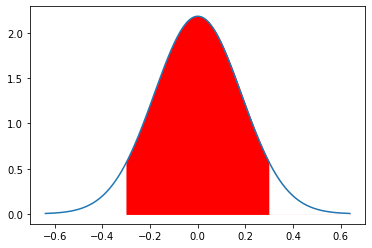

In [22]:
norm_ci(two_sided=True, number_of_samples=30)

# t - distribution Confidence Interval

In [18]:
def t_ci(confidence_interval: float = 0.90,
            sample_std_dev: float = 1,
            number_of_samples:int = 2,
            mean: float = 0,
            two_sided: bool = True
            ):
    '''
    

    Parameters
    ----------
    confidence_interval : float, optional
        DESCRIPTION. The default is 0.90.
    sample_std_dev : float, optional
        DESCRIPTION. The default is 1.
    number_of_samples : int, optional
        DESCRIPTION. The default is 100.
    mean : float, optional
        DESCRIPTION. The default is 0.
    two_sided : bool, optional
        DESCRIPTION. The default is True.

    Returns
    -------
    TYPE
        DESCRIPTION.

    '''
    # declaring problem constants
    x_bar = mean
    n = number_of_samples # number of samples taken
    sigma = sample_std_dev # population standard deviation
    sigma_x_bar = sigma/n**0.5 # std dev of sample means
    df = n-1 # degrees of freedom
    
    # generate x within 3.5 standard deviations and y axes
    x_axis_lower_bound = x_bar-3.5*sigma_x_bar
    x_axis_upper_bound = x_bar+3.5*sigma_x_bar
    steps = (x_axis_upper_bound-x_axis_lower_bound)/1000
    x = np.arange(x_axis_lower_bound,x_axis_upper_bound,steps)
    y = t.pdf(x,df, loc=x_bar,scale=sigma_x_bar)
    
    # get the probabilities of the tail areas
    if two_sided:
        alpha_high = (1+confidence_interval)/2
        alpha_low = (1-confidence_interval)/2
    else:
        alpha_high = confidence_interval
        alpha_low = 0
    # compute the value of x_lower and x_higher
    x_lower = t.ppf(alpha_low,df,loc=x_bar,scale=sigma_x_bar)
    x_higher = t.ppf(alpha_high,df,loc=x_bar,scale=sigma_x_bar)
    
    # plot and shade the graphs
    plt.plot(x,y,'-')
    plt.fill_between(x[x>=x_lower],y[x>=x_lower],color='green')
    plt.fill_between(x[x>=x_higher],y[x>=x_higher],color='white')
    plt.draw()
    return round(x_lower,3), round(x_higher,3)

(-0.31, 0.31)

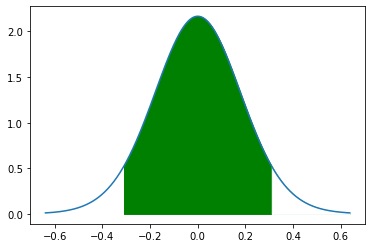

In [21]:
t_ci(two_sided=True, number_of_samples=30)